In [1]:
from datahandler import DataHandler
from models.unet import *
from models.unet_se import *

from generator import *
from params import *
from callbacks import getCallbacks

from tqdm import tqdm
import os
import skimage.io as io

from keras.models import *
from keras import backend as K

%matplotlib inline
import matplotlib.pyplot as plt

import argparse
import sys

Using TensorFlow backend.


In [2]:
#set common variables
epochs = 25
batch_size = 32
verbose = 1


resetSeed()

In [3]:
#Get data and generators
dh = DataHandler()
tr_images, tr_masks, te_images, te_masks = dh.getData()

Validation data: 100%|██████████████████████████| 43/43 [00:46<00:00,  1.06s/it]


In [4]:
from models.resnet_fcn import *

model = getSEUnet()
model.fit(np.expand_dims(tr_images[100], axis=0), np.expand_dims(tr_masks[100], axis=0), epochs=30, verbose=1)

Epoch 1/30
1/1 [==============================] - 6s 6s/step - loss: -48.5100 - dice_coef: 1.5541
Epoch 2/30
1/1 [==============================] - 0s 60ms/step - loss: -56.7643 - dice_coef: 1.6187
Epoch 3/30
1/1 [==============================] - 0s 60ms/step - loss: -65.8028 - dice_coef: 1.6777
Epoch 4/30
1/1 [==============================] - 0s 59ms/step - loss: -74.9980 - dice_coef: 1.7275
Epoch 5/30
1/1 [==============================] - 0s 60ms/step - loss: -84.1680 - dice_coef: 1.7678
Epoch 6/30
1/1 [==============================] - 0s 59ms/step - loss: -93.1858 - dice_coef: 1.8002
Epoch 7/30
1/1 [==============================] - 0s 59ms/step - loss: -102.0366 - dice_coef: 1.8264
Epoch 8/30
1/1 [==============================] - 0s 61ms/step - loss: -110.7068 - dice_coef: 1.8478
Epoch 9/30
1/1 [==============================] - 0s 59ms/step - loss: -119.1760 - dice_coef: 1.8656
Epoch 10/30
1/1 [==============================] - 0s 60ms/step - loss: -127.3983 - dice_coef: 1.88

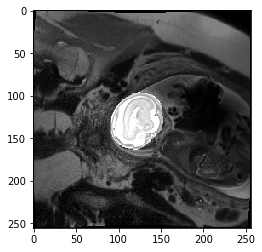

In [5]:
plt.gray()

plt.imshow(np.squeeze(tr_images[104] + tr_masks[104]))

(42, 256, 256, 1)


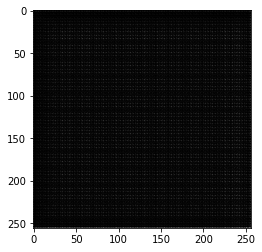

In [6]:
def getGenerator(images, bs=1):
    image_datagen = ImageDataGenerator(rescale=1./255)
    image_datagen.fit(images, augment = True)
    image_generator = image_datagen.flow(x = images, batch_size=bs,
            shuffle = False)

    return image_generator

image, hdr = dh.getImageData('./data/kfold_data/images/0.nii')
gt_mask, _ = dh.getImageData('./data/kfold_data/masks/0.nii', is_mask=True)
    
g = getGenerator(image)
r = model.predict_generator(g, steps=len(image))

print(r.shape)

plt.imshow(np.squeeze(r[24] * 255))